<a href="https://colab.research.google.com/github/navalente/TensorFlow-Developer-Course/blob/master/03_intro_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data
Use the modified data to only use two classes (pizza & steak) using the image modification notebook

> 🔑 **Note**: We start with a smaller dataset so we can experiment quickly and figure out what works (or what doesn't) before scaling up

In [1]:
import tensorflow as tf
print(tf.__version__)
# Check for GPU
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

2.9.1
Num GPUs: 1


In [2]:
import zipfile

# Download zip file of pizza_steak images
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

For a computer vision project, this usually means visualzing the data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [3]:
import os

# Walk through the pizza_steak directory and list number of files
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directiories and {len(filenames)} images in '{dirpath}'.")

There are 2 directiories and 0 images in 'pizza_steak'.
There are 2 directiories and 0 images in 'pizza_steak\test'.
There are 0 directiories and 250 images in 'pizza_steak\test\steak'.
There are 0 directiories and 250 images in 'pizza_steak\test\pizza'.
There are 2 directiories and 0 images in 'pizza_steak\train'.
There are 0 directiories and 750 images in 'pizza_steak\train\steak'.
There are 0 directiories and 750 images in 'pizza_steak\train\pizza'.


In [4]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, let's get the class names programatically

In [6]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories in the training folder (i.e. pizza & steak)
print(class_names)

['pizza' 'steak']


In [8]:
# Let's visulaize our images
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
import random

def view_random_image(target_dir,target_class):
  # Setup the target directory 
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img);
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the image

  return img


['2010437.jpg']
Image shape: (512, 512, 3)


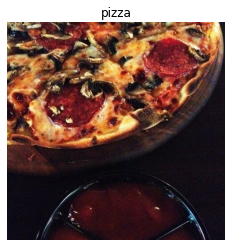

In [90]:
# View random image from the dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [11]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(341, 512, 3), dtype=uint8, numpy=
array([[[ 59, 118, 112],
        [ 60, 119, 113],
        [ 61, 120, 114],
        ...,
        [  0,   0,   0],
        [  2,   2,   0],
        [  4,   4,   2]],

       [[ 60, 119, 113],
        [ 60, 119, 113],
        [ 61, 120, 114],
        ...,
        [  0,   0,   0],
        [  2,   2,   0],
        [  4,   4,   2]],

       [[ 60, 119, 113],
        [ 60, 119, 113],
        [ 61, 120, 114],
        ...,
        [  0,   0,   0],
        [  3,   3,   1],
        [  5,   5,   3]],

       ...,

       [[111,  74,   3],
        [108,  78,   8],
        [ 97,  77,  14],
        ...,
        [178, 190, 214],
        [183, 195, 219],
        [189, 201, 225]],

       [[109,  76,   5],
        [109,  82,  13],
        [ 93,  77,  15],
        ...,
        [187, 199, 223],
        [193, 205, 229],
        [199, 211, 235]],

       [[108,  78,   8],
        [104,  79,  12],
        [ 77,  63,   0],
        ...,
        [195, 207, 23

In [13]:
# View the image shape
img.shape

(341, 512, 3)

In [14]:
# Get all the pixel values between 0 and 1
img/255

array([[[0.23137255, 0.4627451 , 0.43921569],
        [0.23529412, 0.46666667, 0.44313725],
        [0.23921569, 0.47058824, 0.44705882],
        ...,
        [0.        , 0.        , 0.        ],
        [0.00784314, 0.00784314, 0.        ],
        [0.01568627, 0.01568627, 0.00784314]],

       [[0.23529412, 0.46666667, 0.44313725],
        [0.23529412, 0.46666667, 0.44313725],
        [0.23921569, 0.47058824, 0.44705882],
        ...,
        [0.        , 0.        , 0.        ],
        [0.00784314, 0.00784314, 0.        ],
        [0.01568627, 0.01568627, 0.00784314]],

       [[0.23529412, 0.46666667, 0.44313725],
        [0.23529412, 0.46666667, 0.44313725],
        [0.23921569, 0.47058824, 0.44705882],
        ...,
        [0.        , 0.        , 0.        ],
        [0.01176471, 0.01176471, 0.00392157],
        [0.01960784, 0.01960784, 0.01176471]],

       ...,

       [[0.43529412, 0.29019608, 0.01176471],
        [0.42352941, 0.30588235, 0.03137255],
        [0.38039216, 0

## An end-to-end example

Let's build a CNN to find patterns in our images, more specifically we need a way to:
* Load images
* Preprocess images
* Build a CNN to find patterns in images
* Compile CNN
* Fit CNN



Make sure to install tensorflow-gpu if needed!
* `!pip install tensorflow-gpu`
* `!pip install tensorflow==2.9`
* `!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2`

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# 1. Create
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu'
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Note the pattern: Conv2D, Conv2D, MaxPool2D (etc.)

# 2. Compile
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 3. Fit
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 56s 260ms/step - loss: 0.5746 - accuracy: 0.7080 - val_loss: 0.3941 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 4s 86ms/step - loss: 0.4524 - accuracy: 0.7940 - val_loss: 0.3753 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 4s 85ms/step - loss: 0.4174 - accuracy: 0.8093 - val_loss: 0.3421 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 4s 86ms/step - loss: 0.3702 - accuracy: 0.8473 - val_loss: 0.3111 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 4s 89ms/step - loss: 0.3010 - accuracy: 0.8807 - val_loss: 0.2876 - val_accuracy: 0.8700


> 🔑 **Note**: If the above cell is taking longer than ~10 seconds per epoch, make sure yo're using a GPU by going to

Runtime -> Change runtime type -> You may have to run cells above

In [11]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

📚 **Resource**: Go through CNN explainer website, https://poloclub.github.io/cnn-explainer/

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with the image data set

In [16]:
# Set random seed
tf.random.set_seed(42)

# 1. Build
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2. Compile
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 4s 83ms/step - loss: 0.9540 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 4s 80ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 4s 81ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 4s 81ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 4s 81ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [17]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than CNN, our NN performs poorly. Let's try to improve it

In [18]:
# Set random seed
tf.random.set_seed(42)

# 1. Build
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2. Compile
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit
model_3.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 4s 84ms/step - loss: 3.3617 - accuracy: 0.6220 - val_loss: 0.7746 - val_accuracy: 0.6860
Epoch 2/5
47/47 [==============================] - 4s 82ms/step - loss: 0.8828 - accuracy: 0.6953 - val_loss: 0.5976 - val_accuracy: 0.7340
Epoch 3/5
47/47 [==============================] - 4s 81ms/step - loss: 0.5345 - accuracy: 0.7733 - val_loss: 0.8998 - val_accuracy: 0.7120
Epoch 4/5
47/47 [==============================] - 4s 80ms/step - loss: 0.7485 - accuracy: 0.7473 - val_loss: 0.5182 - val_accuracy: 0.7320
Epoch 5/5
47/47 [==============================] - 4s 82ms/step - loss: 0.4852 - accuracy: 0.7880 - val_loss: 0.6081 - val_accuracy: 0.7380


In [19]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


🔑 **Note**: You can think of trainable parameters as **patterns a model can learn from data**. You might think more is better, but the difference here is the two different styles of model we're using. A series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns. **A convolutional neural network seeks to sort out and learn the most important patterns in an image.** So even though there are less learnable parameters in our CNN, these are often *more helpful* in dechiphering between different **features** in an image.

In [20]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Binary Classification: Let's break it down
1. Become one with the data (visualize)
2. Preprocess the data (prepared it for our model, scaling/normalization and turning our data into batches)
3. Created a model (started with baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to improve our baseline)
7. Repeat until satisfied

### 1. Become one with the data


['1823263.jpg']
Image shape: (512, 512, 3)
['2577377.jpg']
Image shape: (512, 512, 3)


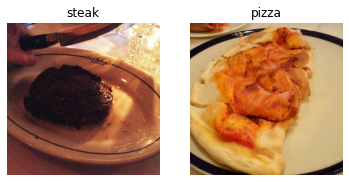

In [21]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

### 2. Preprocess the data

In [22]:
# Define directory dataset path
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than looking at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this because:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU)
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?
Because 32 is good for your health ... (LeCun)

In [23]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [24]:
# Load in our image data from directories and turn them into batches
train_data=train_datagen.flow_from_directory(directory=train_dir, # Target folder
                                             batch_size=32, # Size of minibatches
                                             target_size=(224,224), # (height,width)
                                             class_mode="binary") # type of problem

test_data=train_datagen.flow_from_directory(directory=test_dir,
                                            batch_size=32,
                                            target_size=(224,224),
                                            class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the next batch of images/labels
len(images), len(labels)

(32, 32)

In [26]:
# How many batches are there?
len(train_data)

1500/32 # Total number of images / number of batches ... it rounds up

46.875

In [27]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [29]:
images[7].shape

(224, 224, 3)

In [30]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

###  3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then you keep experimenting, you try to beat the baseline.

🔑 **Note**: In deep learning, there is almost an inifite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [31]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [32]:
# Create the model (this will be our baseline, a 3 layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filters is the number of sliding windows going across an input
           kernel_size=3, # the size of the sliding window going across an input
           strides=1, # the size of the step the sliding window takes across an input
           padding="valid", # if "same", output shape is same as input shape if "valid"
           activation="relu",
           input_shape=(224,224,3)), # input layer (specify input shape)
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid") # output layer (working with binary classification, so only 1 ouput neuron)
])

In [33]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [34]:
# Get the summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [35]:
# Check the lengths of training and test generations
len(train_data), len(test_data)

(47, 16)

In [36]:
# Fit the model
history_4 = model_4.fit(train_data, # combination of labels and sample data thanks to flow_from_directory
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 6s 111ms/step - loss: 0.9299 - accuracy: 0.6827 - val_loss: 0.4238 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 5s 100ms/step - loss: 0.4176 - accuracy: 0.8133 - val_loss: 0.3803 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 5s 101ms/step - loss: 0.3087 - accuracy: 0.8800 - val_loss: 0.4186 - val_accuracy: 0.8060
Epoch 4/5
47/47 [==============================] - 5s 102ms/step - loss: 0.1345 - accuracy: 0.9613 - val_loss: 0.4604 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 5s 102ms/step - loss: 0.0537 - accuracy: 0.9853 - val_loss: 0.5391 - val_accuracy: 0.8020


### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it

<AxesSubplot:>

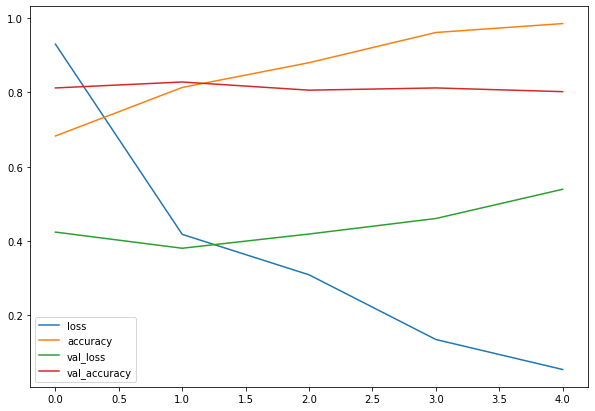

In [37]:
# Plot training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [38]:
# Plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Return seperate loss curves to evaluate different metrics
  """
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  epochs=range(len(history.history["loss"])) # how many epochs 

  # Plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

> 🔑 **Note**: When a model's **validation loss starts to increase** it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the dataset *too well** and thus the model's ability to generalize to unseen data will be diminished

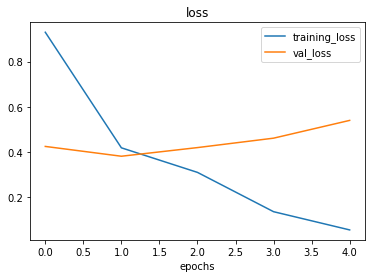

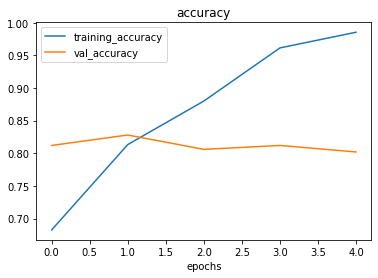

In [39]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### Adjust the model's parameters

Fitting a machine learning model comes in 3 steps:
1. Create a baseline
2. Beat the baseline by overfitting a larger model
3. Reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization (such as MaxPool2D)
* Add more data...

> 🔑 **Note**: Reducing overfitting is also known as **regularization**.

In [40]:
# 1. Build (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [41]:
# 2. Compile
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [42]:
# 3. Fit
history_5 = model_5.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 246ms/step - loss: 0.6151 - accuracy: 0.6613 - val_loss: 0.5267 - val_accuracy: 0.7240
Epoch 2/5
47/47 [==============================] - 4s 82ms/step - loss: 0.4699 - accuracy: 0.7900 - val_loss: 0.4261 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 4s 81ms/step - loss: 0.4268 - accuracy: 0.8147 - val_loss: 0.3515 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 4s 81ms/step - loss: 0.4046 - accuracy: 0.8293 - val_loss: 0.5278 - val_accuracy: 0.7020
Epoch 5/5
47/47 [==============================] - 4s 83ms/step - loss: 0.3958 - accuracy: 0.8327 - val_loss: 0.3352 - val_accuracy: 0.8660


In [43]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

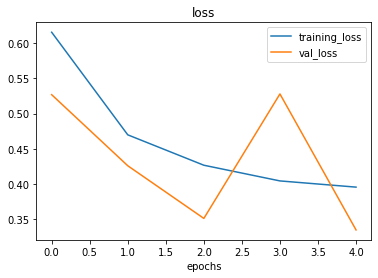

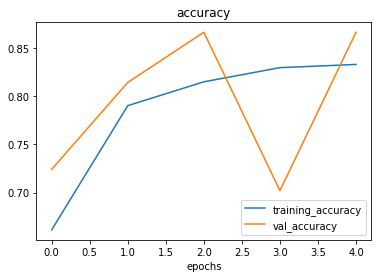

In [44]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augementation

In [45]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image?
                                             shear_range=0.2, # how much do you want to stretch an image?
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move image on x-axis
                                             height_shift_range=0.2, # move image on y-axis
                                             horizontal_flip=True) # do you want to flip an image?

# Create ImageDataGenerator without data augmentation
train_datagen=ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for test
test_datagen=ImageDataGenerator(rescale=1/255.)


> ❓ **Question**: What is data augmentation?

Data augmentation is the process of alterning our training data, leading it to have more diversity and in turn allowing our models to learn more gernalizable (hoepfully) patterns. 

Alterning might mean:
* Adjusting the rotation of an image
* Flipping an image 
* Cropping an image 
* Or something similar

Let's write some code to visulaize data augmentation



In [46]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                   target_size=(224,224),
                                                                   class_mode="binary",
                                                                   batch_size=32,
                                                                   shuffle=False) # For demonstration purposes only

# Create non-augmented training data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32,
                                               shuffle=False)

# Create non-augmented test data batches
print("Non-augmented testing data:")
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32,
                                             shuffle=False)



Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented testing data:
Found 500 images belonging to 2 classes.


> **Note**: Data augementation is usaully only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally, let's visualize some augmented data!!

In [47]:
# Get sample data batches
images, labels = train_data.next()
augmented_images,augmented_labels = train_data_augmented.next() # note: labels aren't augmented only labels

showing image number: 1


(-0.5, 223.5, 223.5, -0.5)

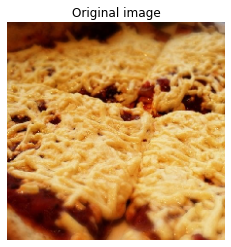

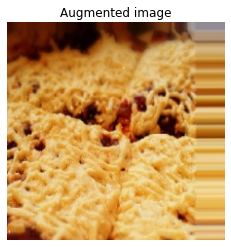

In [48]:
# Show original image and augmented image
import random
random_number = random.randint(0,32) # our batch sizes are 32 ...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

Now we've seen what augmented training data looks like, let's build a model and see how it learn on augmented data

In [49]:
# 1. Build (same as model_5)
model_6 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

# 2. Compile
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# 3. Fit
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 15s 308ms/step - loss: 0.7203 - accuracy: 0.4760 - val_loss: 0.6884 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 15s 310ms/step - loss: 0.6883 - accuracy: 0.6087 - val_loss: 0.6732 - val_accuracy: 0.7060
Epoch 3/5
47/47 [==============================] - 15s 312ms/step - loss: 0.6771 - accuracy: 0.6147 - val_loss: 0.6030 - val_accuracy: 0.8080
Epoch 4/5
47/47 [==============================] - 14s 308ms/step - loss: 0.6682 - accuracy: 0.6247 - val_loss: 0.5980 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 14s 306ms/step - loss: 0.6376 - accuracy: 0.6753 - val_loss: 0.5344 - val_accuracy: 0.7240


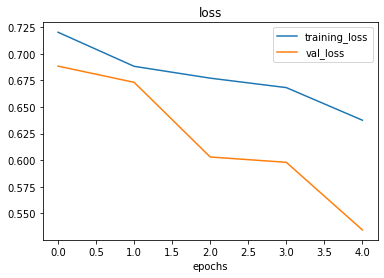

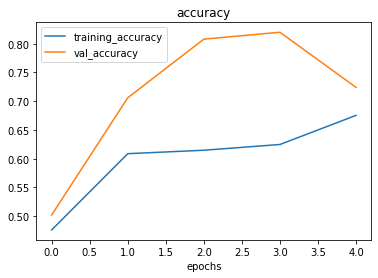

In [50]:
# Check our models training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) and see what happens.

In [51]:
# Import data and augment it and shuffle it
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224,224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True) # shuffle data this time

Found 1500 images belonging to 2 classes.


In [52]:
# Create the model (same as model_5, just using shuffled augmented data)
model_7 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

# 2. Compile
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# 3. Fit
history_7=model_7.fit(train_data_augmented_shuffled, # we're fitting on augmented and shuffled data now
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented_shuffled),
                      validation_data=test_data,
                      validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 15s 310ms/step - loss: 0.6261 - accuracy: 0.6360 - val_loss: 0.4736 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 14s 307ms/step - loss: 0.5555 - accuracy: 0.7093 - val_loss: 0.4251 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 15s 309ms/step - loss: 0.4993 - accuracy: 0.7600 - val_loss: 0.3716 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 15s 314ms/step - loss: 0.4749 - accuracy: 0.7773 - val_loss: 0.3411 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 15s 311ms/step - loss: 0.4615 - accuracy: 0.7860 - val_loss: 0.3280 - val_accuracy: 0.8580


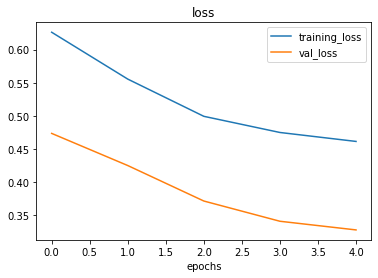

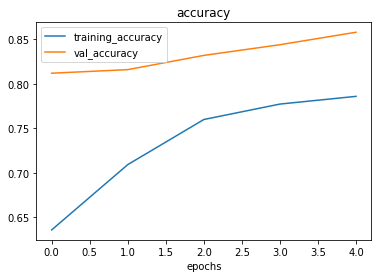

In [53]:
# Plot the loss curves
plot_loss_curves(history_7)

**Note**: When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak)

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could do to improve our model:
* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (eg. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case

## Making a prediction with out trained model on our own custom data

In [54]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


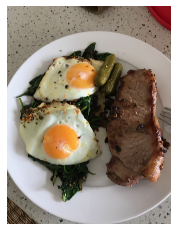

In [55]:
# View our example image
import matplotlib.image as mpimg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

Can we validate the data using a custom input shape?

In [61]:
# Check the shape of our image, expand to a rank 4 tensor
expanded_steak = tf.expand_dims(steak,axis=0)

**Note**: When you train a neural network, and you want to make a predicition with it on your own custom data, it's important that you custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [63]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename,img_shape=224):
    """
    Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour channels)
    """
    # Read in the image
    img = tf.io.read_file(filename)
    # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img,[img_shape,img_shape])
    # Rescale the image (get all values between 0 and 1)
    img = img/255.
    return img

In [67]:
# Load in and preprocess custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [72]:
pred = model_7.predict(tf.expand_dims(steak,axis=0))
pred

1/1 [==============================] - 0s 19ms/step


array([[0.9157704]], dtype=float32)

Looks like our custom image is being put through our model; however, it currently outputs a prediction probability. Wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [71]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [74]:
# We can index the predicited class by roudning the predicition probability and indexing it on the class names
pred_class=class_names[int(tf.round(pred))] 
pred_class

'steak'

In [77]:
def pred_and_plt(model,filename,class_names=class_names):
    """"
    Imports an image located at filename, makes a prediction with model
    and plot the image with the predicited class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)
    
    # Make a prediction
    pred = model_7.predict(tf.expand_dims(img,axis=0))

    # Get the predicted class
    pred_class = class_names[int(tf.round(pred)[0][0])]


    # Plot the image and predicited class
    plt.figure()
    plt.imshow(img)
    plt.axis(False)
    plt.title(f"Prediction: {pred_class}");

1/1 [==============================] - 0s 17ms/step


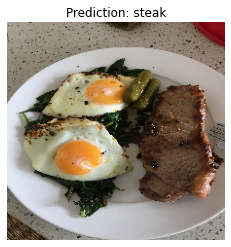

In [78]:
# Test our model on a custom image
pred_and_plt(model_7,"03-steak.jpeg")

Our model works. Let's try it on another image

1/1 [==============================] - 0s 16ms/step


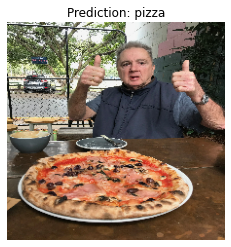

In [81]:
pred_and_plt(model_7,"03-pizza-dad.jpeg")

# Multiclass Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now let's step things out a notch with 10 classses of food

1. Become one with the data
2. Preporcess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evalaute the model
6. Adjust different hyperparameters
7. Repeat until satisfied

### 1. Import and become one with the data

In [82]:
import zipfile

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [83]:
import os

# Walk through 10 classes of food images
for dirpath,dirnames,filesnames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 750 images in '10_food_classes_all_data'.
There are 10 directories and 750 images in '10_food_classes_all_data\test'.
There are 0 directories and 750 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 750 images in '10_food_classes_all_data\test\sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data\test\fried_rice'.
There 

In [87]:
# Setup the train and test directories
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"


In [85]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['672975.jpg']
Image shape: (512, 512, 3)


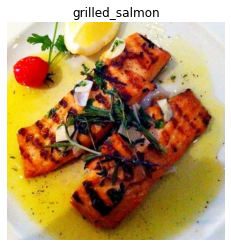

In [135]:
# Visualize the data
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for model)

In [138]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocess the data (0 and 1)
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

# Import data and make into batches
train_data=train_datagen.flow_from_directory(train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="categorical")

test_data=test_datagen.flow_from_directory(test_dir,
                                           batch_size=32,
                                           target_size=(224,224),
                                           class_mode="categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

We have been talking a lot about the [CNN explainer website](https://poloclub.github.io/cnn-explainer/). Let's use their model (also on 10 classes) and use it for our model

In [143]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# 1. Build
model_8 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax") # softmax used for activation because multiclass classification
])

# 2. Compile
model_8.compile(loss="categorical_crossentropy", # One hot conded label
                optimizer=Adam(),
                metrics=["accuracy"])


### 4. Fit a model

In [144]:
# 3. Fit
history_8=model_8.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 21s 88ms/step - loss: 2.1369 - accuracy: 0.2208 - val_loss: 1.9593 - val_accuracy: 0.2876
Epoch 2/5
235/235 [==============================] - 21s 88ms/step - loss: 1.7645 - accuracy: 0.3985 - val_loss: 1.8478 - val_accuracy: 0.3528
Epoch 3/5
235/235 [==============================] - 21s 90ms/step - loss: 1.2751 - accuracy: 0.5847 - val_loss: 1.9810 - val_accuracy: 0.3276
Epoch 4/5
235/235 [==============================] - 21s 89ms/step - loss: 0.6002 - accuracy: 0.8108 - val_loss: 2.7385 - val_accuracy: 0.2876
Epoch 5/5
235/235 [==============================] - 53s 226ms/step - loss: 0.1852 - accuracy: 0.9495 - val_loss: 3.7648 - val_accuracy: 0.2880


### 5. Evaluate the model

In [146]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 5s 61ms/step - loss: 3.7648 - accuracy: 0.2880


[3.764798879623413, 0.2879999876022339]

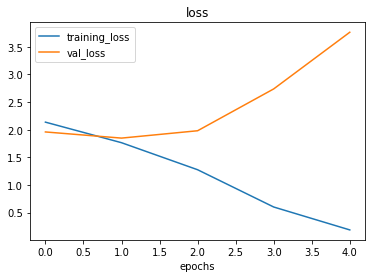

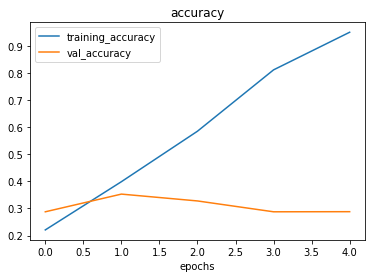

In [145]:
# Let's look at the loss curves
plot_loss_curves(history_8)

What do these loss curves tell us? 

Well... it seems our model is **overfitting** the training set quite badly. (i.e. it is getting great results on the training data but fails to generalize well to unseen data)

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something...

However, it's not genrealizing well to unseen data (overfitting).

So let's try and fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to reduce the number of layers or hidden units
* **Data augmentation** - increase the diversity of your training data
* **Transfer learning** - leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset 

In [149]:
# Let's simplify the model by removing 2 convolutional results

# 1. Create the model
model_9 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

# 2. Compile
model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [151]:
# 3. Fit
history_9 = model_9.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 59s 250ms/step - loss: 2.0809 - accuracy: 0.2617 - val_loss: 1.9193 - val_accuracy: 0.3112
Epoch 2/5
235/235 [==============================] - 19s 82ms/step - loss: 1.7995 - accuracy: 0.3852 - val_loss: 1.8706 - val_accuracy: 0.3564
Epoch 3/5
235/235 [==============================] - 19s 82ms/step - loss: 1.4609 - accuracy: 0.5103 - val_loss: 1.8914 - val_accuracy: 0.3428
Epoch 4/5
235/235 [==============================] - 19s 81ms/step - loss: 1.0304 - accuracy: 0.6741 - val_loss: 2.0601 - val_accuracy: 0.3456
Epoch 5/5
235/235 [==============================] - 20s 83ms/step - loss: 0.6074 - accuracy: 0.8215 - val_loss: 2.6395 - val_accuracy: 0.2976


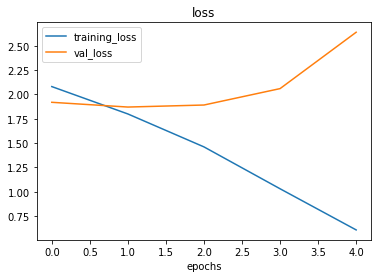

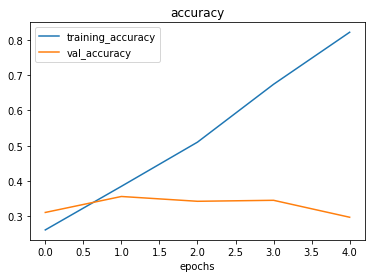

In [152]:
# Let's look at the loss curves
plot_loss_curves(history_9)

In [155]:
# Let's get a model summary. Note that the number of trainable parameters resemble model_8.
model_9.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 29160)             0         
                                                                 
 dense_17 (Dense)            (None, 10)              

Simplifying the model experiment didn't go to plan. The accuracy went down and overfitting continued.

Let's try data augmentation

### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves to be similar)
* Improve validation accuracy

In [161]:
# Create augmented training data
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           horizontal_flip=True)                                

# Create augmented training batches
train_data_augmented= train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                  target_size=(224,224),
                                                                  batch_size=32,
                                                                  class_mode="categorical")                                                               

Found 7500 images belonging to 10 classes.


In [164]:
# Clone model to create the same model summary as input
model_10 = tf.keras.models.clone_model(model_8)

# 2. Compile
model_10.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

In [165]:
# 3. Fit
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 74s 314ms/step - loss: 2.2143 - accuracy: 0.1668 - val_loss: 2.0668 - val_accuracy: 0.2400
Epoch 2/5
235/235 [==============================] - 72s 305ms/step - loss: 2.0748 - accuracy: 0.2543 - val_loss: 1.9189 - val_accuracy: 0.3304
Epoch 3/5
235/235 [==============================] - 72s 304ms/step - loss: 1.9885 - accuracy: 0.3100 - val_loss: 1.7730 - val_accuracy: 0.3932
Epoch 4/5
235/235 [==============================] - 71s 304ms/step - loss: 1.9238 - accuracy: 0.3352 - val_loss: 1.8045 - val_accuracy: 0.3768
Epoch 5/5
235/235 [==============================] - 74s 314ms/step - loss: 1.8899 - accuracy: 0.3507 - val_loss: 1.9613 - val_accuracy: 0.3608


In [168]:
# Let's reminder ourselves how model_8 performed
model_8.evaluate(test_data)

79/79 [==============================] - 14s 180ms/step - loss: 3.7648 - accuracy: 0.2880


[3.764798879623413, 0.2879999876022339]

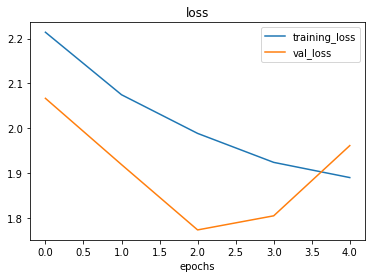

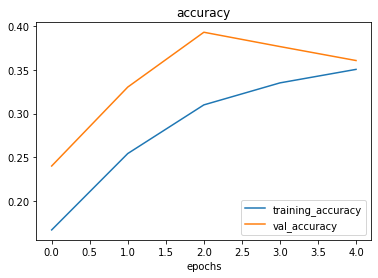

In [169]:
# Check the loss curves
plot_loss_curves(history_10)

The result of `model_10` looks much better seeing that the loss curves are much closer to eachother when compared to the baseline model. They look like they're heading in the right direction so if we train for longer we might be able to further improve.

### 7. Repeat until satisfied

We could keep going ... continually tring to bring our loss curvevs closer together and trying to improve the validation/test accuracy

We do this by running experiments, namely:
- Restructing our model's architecture (increasing layers/hidden units)
- Adjust the learning rate
- Try different methods of data augmentation (adjust the hyperparameters in our ImageDataGErnator instance)
- Train for longer (e.g. 10 epochs)
- Try **transfer learning**

### Making a prediction with our trained model

Let's use our trained model to make some predictions on our own custom images

In [170]:
# Remind oursevles of the classes our model was trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [177]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plt(model,filename,class_names=class_names):
    """"
    Imports an image located at filename, makes a prediction with model
    and plot the image with the predicited class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)
    
    # Make a prediction
    pred = model_7.predict(tf.expand_dims(img,axis=0))

    # Add in logic for multi-class
    if len(pred[0]) > 1:
        pred_class=class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred[0]))]


    # Plot the image and predicited class
    plt.figure()
    plt.imshow(img)
    plt.axis(False)
    plt.title(f"Prediction: {pred_class}");

1/1 [==============================] - 0s 14ms/step


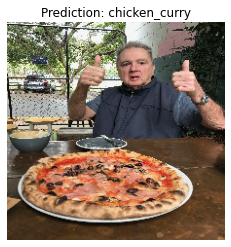

In [178]:
# Make a prediction using model_10
pred_and_plt(model_10,"03-pizza-dad.jpeg",class_names)

1/1 [==============================] - 0s 14ms/step


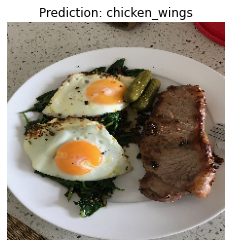

In [179]:
# Make a prediction using model_10
pred_and_plt(model_10,"03-steak.jpeg",class_names)

1/1 [==============================] - 0s 15ms/step


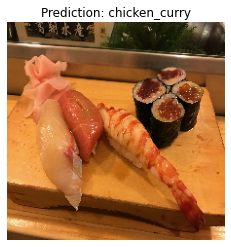

In [180]:
# Make a prediction using model_10
pred_and_plt(model_10,"03-sushi.jpeg",class_names)

1/1 [==============================] - 0s 15ms/step


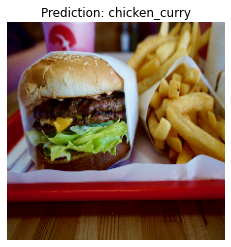

In [181]:
# Make a prediction using model_10
pred_and_plt(model_10,"03-hamburger.jpeg",class_names)

Our model didn't perform very well on our custom images but this is because it only achieved ~39% accuracy on the test data. So we were expecting it to perform poorly.

## Saving and loading our model

In [182]:
# Save a model
model_10.save("saved_trained_model_10")

INFO:tensorflow:Assets written to: saved_trained_model_10\assets


INFO:tensorflow:Assets written to: saved_trained_model_10\assets


In [183]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 15s 185ms/step - loss: 1.9613 - accuracy: 0.3608


[1.9612566232681274, 0.36079999804496765]

In [185]:
# Compare our loaded model to our exisiting model
model_10.evaluate(test_data)

79/79 [==============================] - 5s 61ms/step - loss: 1.9613 - accuracy: 0.3608


[1.9612568616867065, 0.36079999804496765]